# Plot Gompertz law fits for proliferation data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os, sys
import glob
import pandas as pd

In [2]:
data_directory = '/Users/sns9/Research/GrowthCurves/g10-06p23/'
os.chdir(data_directory)

casename = 'growth_'

data_files = glob.glob(casename+'*.csv')#'growth_60.csv'

fit_data_files = glob.glob('fit_'+casename+'*.csv')

In [3]:
print(data_files)
print(fit_data_files)

['growth_20.csv', 'growth_30.csv', 'growth_60.csv', 'growth_5.csv', 'growth_0.csv', 'growth_15.csv', 'growth_10.csv']
['fit_growth_20.csv', 'fit_growth_30.csv', 'fit_growth_15.csv', 'fit_growth_10.csv', 'fit_growth_0.csv', 'fit_growth_60.csv', 'fit_growth_5.csv']


In [4]:
all_files = {}
times = []

for ff in data_files:
    t = float(ff.lstrip(casename).rstrip('.csv'))
    times.append(int(t))
    all_files[int(t)] = ff

times.sort()

print(times)

[0, 5, 10, 15, 20, 30, 60]


In [5]:
ori_data = []
fit_data = []

for t in times:
    ori_data.append(pd.read_csv(casename+str(t)+'.csv').to_numpy())
    fit_data.append(pd.read_csv('fit_'+casename+str(t)+'.csv',header=None).to_numpy())

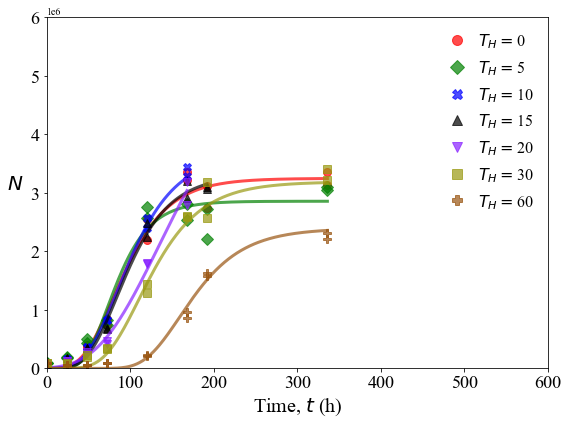

In [6]:
fig, axs = plt.subplots(figsize=(8,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

color_list = ['r','g','b','#000000','#8822ff','#999911','#995511']
marker_list = ['o','D','X','^','v','s','P']

for i in range(0,len(times)):
    c = color_list[i]
    plt.plot(ori_data[i][:,0],ori_data[i][:,1],marker=marker_list[i],ms=8,color=c,alpha=0.7,linewidth=0,label=r'$T_{H}= $'+str(times[i]))
    plt.plot(ori_data[i][:,0],ori_data[i][:,2],marker=marker_list[i],ms=8,color=c,alpha=0.7,linewidth=0)
    plt.plot(fit_data[i][:,0],fit_data[i][:,1],linewidth=3,color=c,alpha=0.7)
    
plt.xticks(size=18)
plt.yticks(size=18)  
plt.xlabel(r'Time, $t$ (h)',size=20)
plt.ylabel(r'$N$',size=20,rotation=0,labelpad=15)
plt.xlim(0,600)
plt.ylim(0,6000000)
plt.legend(frameon=False,prop={'size': 16},markerscale=1.25,handlelength=1.0)
plt.tight_layout()

#plt.savefig('proliferation_plot.png',dpi=600)